# SciPy Signal


## Dokumentation

- [SciPy Signal processing (scipy.signal)](https://docs.scipy.org/doc/scipy/reference/signal.html)
- [SciPy Signal processing: Continuous-Time Linear Systems](https://docs.scipy.org/doc/scipy/reference/signal.html#continuous-time-linear-systems)

In [1]:
%pylab inline

import scipy.signal as signal

Populating the interactive namespace from numpy and matplotlib


In [2]:
# set default values for plotting:
rcParams['axes.titlesize']  = 14
rcParams['axes.labelsize']  = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 12
rcParams['lines.linewidth'] = 2

Aus der Hilfe zum Befehl `signal.TransferFunction()`:

Construct the transfer function: $H(s) = \frac{s^2 + 3s + 3}{s^2 + 2s + 1}$

```python
from scipy import signal
num = [1, 3, 3]
den = [1, 2, 1]
signal.TransferFunction(num, den)
```

## Beispiele

### Nise: Example 2.4

$\dot{c} + 2c = r$ mit Null-Anfangsbedingungen hat die Übertragungsfunktion $G(s) = \frac{1}{s + 2}$.

In [4]:
num = [1]
den = [1, 2]

system = signal.TransferFunction(num, den)

**Sprungantwort $y(t)$:**

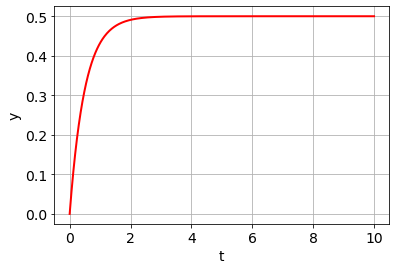

In [5]:
t = linspace(0, 10, 500)
x0 = None   # Initial state-vector (default is zero)

t, y = signal.step(system, x0, t)
# Alternative:
# t, y = system.step(x0, t)

figure(figsize=(6,4))
plot(t, y, '-r')
xlabel('t')
ylabel('y')
grid(True)

**Output $y(t)$ für allgemeinen Input $u(t)$:**

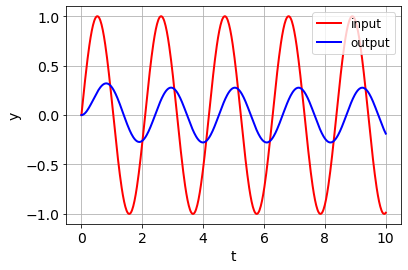

In [6]:
u = sin(3*t)
# u = t

t, y, x = signal.lsim(system, u, t)

figure(figsize=(6,4))
plot(t, u, '-r', label= 'input')
plot(t, y, '-b', label='output')
legend()
xlabel('t')
ylabel('y')
grid(True)

### Nise: Example 2.3

$\ddot{y} + 12\dot{y} + 32y = 32u$ mit Null-Anfangsbedingungen hat die Übertragungsfunktion $G(s) = \frac{32}{s^2 + 12s + 32}$ mit den Polen $s=-4$ und $s=-8$.

In [7]:
num = [32]
den = [1, 12, 32]

system = signal.TransferFunction(num, den)

**Sprungantwort $y(t)$:**

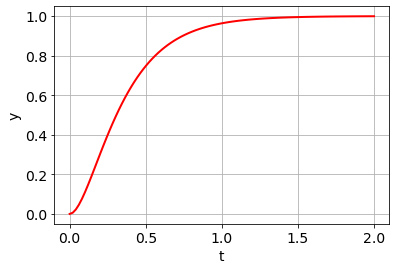

In [8]:
t = linspace(0, 2, 100)
x0 = None

figure(figsize=(6,4))
t, y = signal.step(system, x0, t)
plot(t, y, '-r')
xlabel('t')
ylabel('y')
grid(True)

**Output $y(t)$ für allgemeinen Input $u(t)$:**

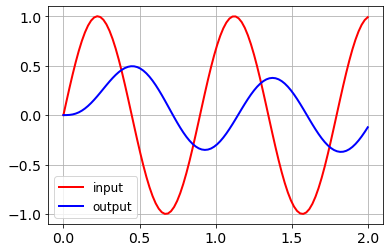

In [9]:
u = sin(7*t)
# u = t

t, y, x = signal.lsim(system, u, t)

figure(figsize=(6,4))
plot(t, u, '-r', label= 'input')
plot(t, y, '-b', label='output')
legend()
grid(True)

### Nise: S. 41 f.

$\ddot{y} + 2\dot{y} + 5y = 3u$ mit Null-Anfangsbedingungen hat die Übertragungsfunktion $G(s) = \frac{3}{s^2 + 2s + 5}$ mit komplexen Polen.

In [10]:
num = [3]
den = [1, 2, 5]

system = signal.TransferFunction(num, den)

In [12]:
system.zeros

array([], dtype=float64)

In [13]:
system.poles

array([-1.+2.j, -1.-2.j])

**Sprungantwort $y(t)$:**

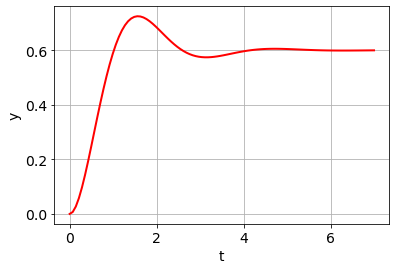

In [14]:
t = linspace(0, 7, 100)
x0 = None

figure(figsize=(6,4))
t, y = signal.step(system, x0, t)
plot(t, y, '-r')
xlabel('t')
ylabel('y')
grid(True)

### Rückgekoppelter Integrator

Philippsen S. 142 f.

- Übertragungsfunktion $\frac{1}{s - k}$
- Sprungantwort hat die Laplacetransformierte $\frac{1}{(s - k)s} = \frac{1}{s^2 - ks}$.

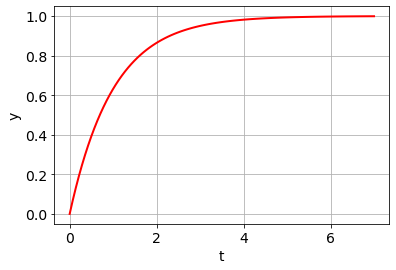

In [17]:
k =  0
k =  1
k = -1

num = [1]
den = [1, -k]

system = signal.TransferFunction(num, den)

t = linspace(0, 7, 100)
x0 = None

figure(figsize=(6,4))
t, y = signal.step(system, x0, t)
plot(t, y, '-r')
xlabel('t')
ylabel('y')
grid(True)

## Frequenzgang

In [18]:
num = [1]
den = [1, 1]

system = signal.TransferFunction(num, den)

In [19]:
omega = logspace(-3, 5, 100)
omega, G = system.freqresp(omega)

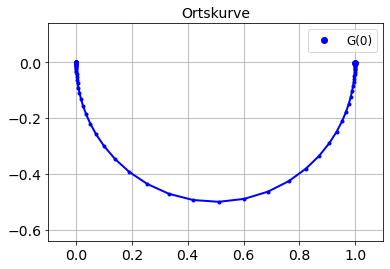

In [22]:
plot(G.real, G.imag, ".-b")
plot(G[0].real, G[0].imag, "ob", label='G(0)')
axis('equal')
xlim(-0.1, 1.1)
title('Ortskurve')
legend()
grid(True)

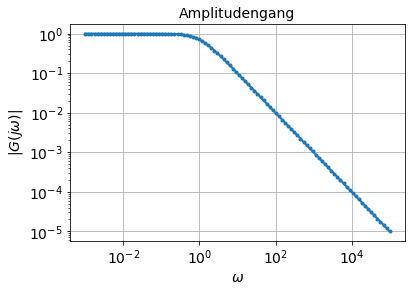

In [23]:
loglog(omega, absolute(G), '.-')
xlabel('$\omega$')
ylabel('$|G(j\omega)|$')
title('Amplitudengang')
grid(True)

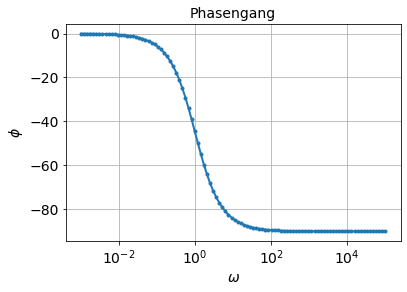

In [24]:
semilogx(omega, angle(G, deg = True), '.-')
xlabel('$\omega$')
ylabel('$\phi$')
title('Phasengang')
grid(True)

## Aufgaben

### Aufgabe 1: Reglerentwurf mit SciPy Signal

Auf den Seiten 7 und 8 der Vorlesungsunterlage `RT_Anwendungen_pdfscan.pdf` wurde das stationäre Regelkreisverhalten an  Beispielen mit Hilfe des Endwertsatzes untersucht. Verwenden Sie die Funktionen von [SciPy Signal processing: Continuous-Time Linear Systems](https://docs.scipy.org/doc/scipy/reference/signal.html#continuous-time-linear-systems), um die Ergebnisse der Vorlesung anhand der jeweiligen zeitlichen Verläufe $w(t), z(t), x(t)$ und $e(t)$ zu überprüfen.

**Lösung:**

*Fall 1a:*

- $w(t) = 1$ ... Sprungfunktion (für t>=0) -> $W(s) = \frac{1}{s}$
- $z(t) = 0$ -> $Z(s) = 0$  

Verwendung eines P-Reglers $R(s) = k$. Dann gilt:
- $G_o(s) = R(s)G_1(s)G_2(s) = \frac{k}{(1+s)(1+2s)}$. 
- Regelgröße $X(s) = \frac{G_o}{1+G_o} W(s) = \frac{k}{2s^2+3s+k+1} \frac{1}{s}$. 
- Somit lautet die Führungsübertragungsfunktion: $G_w(s) = \frac{k}{2s^2+3s+k+1}$. 
- Regeldifferenz (Error) $E(s)= W(s) - X(s) = W(s) - \frac{G_o}{1+G_o} W(s)=\frac{1}{1+G_o} W(s) = \frac{2s^2+3s+1}{2s^2+3s+k+1} \frac{1}{s}$. 
- Somit lautet die Übertragungsfunktion für die Regeldifferenz: $G_e(s) = \frac{2s^2+3s+1}{2s^2+3s+k+1}$.

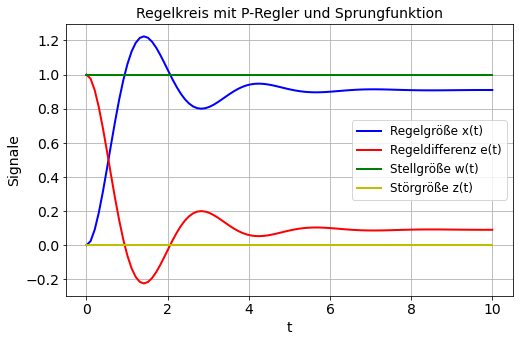

In [3]:
# Fall 1a: Grafische Darstellung der Signale x(t), w(t), e(t) und z(t)

k     = 10            # wählbar
x0    = None
numGw = [k]
denGw = [2, 3, k+1]

numGe = [2, 3, 1]
denGe = [2, 3, k+1]

systemGw = signal.TransferFunction(numGw, denGw)
systemGe = signal.TransferFunction(numGe, denGe)

t = linspace(0, 10, 100)
t, x = signal.step(systemGw, x0, t)
t, e = signal.step(systemGe, x0, t)
w = ones(len(t))
z = zeros(len(t))

figure(figsize=(8,5))
title('Regelkreis mit P-Regler und Sprungfunktion')
plot(t, x, '-b', label='Regelgröße x(t)')
plot(t, e, '-r', label='Regeldifferenz e(t)')
plot(t, w, '-g', label='Stellgröße w(t)')
plot(t, z, '-y', label='Störgröße z(t)')
xlabel('t')
ylabel('Signale')
legend()
grid(True)

Überprüfung der Ergebnisse mittels Endwertsatz  

- $\lim_{t\to \infty}x(t) = \lim_{s\to 0}sX(s) = \lim_{s\to 0}s\frac{k}{2s^2 + 3s + k+1} \frac{1}{s} = \frac{k}{k+1}$  
- $\lim_{t\to \infty}e(t) = \lim_{s\to 0}sE(s) = \lim_{s\to 0}s\frac{2s^2+3s+1}{2s^2+3s+k+1} \frac{1}{s} = \frac{1}{k+1}$  

In [4]:
Endwertx = k/(k+1)
Endwerte = 1/(k+1)
print('Die Regelgröße x(t)     stellt sich bei t gegen unendlich und k=',k,'auf',Endwertx,'ein.')
print('Die Regeldifferenz e(t) stellt sich bei t gegen unendlich und k=',k,'auf',Endwerte,'ein.')

Die Regelgröße x(t)     stellt sich bei t gegen unendlich und k= 10 auf 0.9090909090909091 ein.
Die Regeldifferenz e(t) stellt sich bei t gegen unendlich und k= 10 auf 0.09090909090909091 ein.


Ergebnis Fall 1a: 

Der Regelkreis mit dem P-Regler stellt sich zwar innerhalb weniger Zeiteinheiten (>7) ein (hört auf zu Schwingen), jedoch stellt sich die Regelgröße nicht auf den gewünschen Wert der Stellgröße ein. Es besteht demnach eine ständige Regeldifferenz. Eine Erhöhung des Faktors k des P-Regler verringert die Regeldifferenz, jedoch ist die Erhöhung des Verstärkungsfaktors k in der Praxis begrenzt.

*Fall 1b:*

Wie Fall 1a, nur mit dem Unterschied der Verwendung eines I-Reglers (anstele eines P-Reglers): $R(s) = \frac{1}{s}$. Nun gilt: 
- $G_o(s) = R(s)G_1(s)G_2(s) = \frac{1}{s(1+s)(1+2s)}$.
- Regelgröße $X(s) = \frac{G_o}{1+G_o} W(s) = \frac{1}{2s^3+3s^2+s+1} \frac{1}{s}$  
- Somit lautet die Führungsübertragungsfunktion: $G_w(s) = \frac{1}{2s^3+3s^2+s+1}$.
- Regeldifferenz (Error) $E(s)= W(s) - X(s) = W(s) - \frac{G_o}{1+G_o} W(s)=\frac{1}{1+G_o} W(s) = \frac{2s^3+3s^2+s}{2s^3+3s^2+s+1} \frac{1}{s}$.
- Somit lautet die Übertragungsfunktion für die Regeldifferenz: $G_e(s) = \frac{2s^3+3s^2+s}{2s^3+3s^2+s+1}$

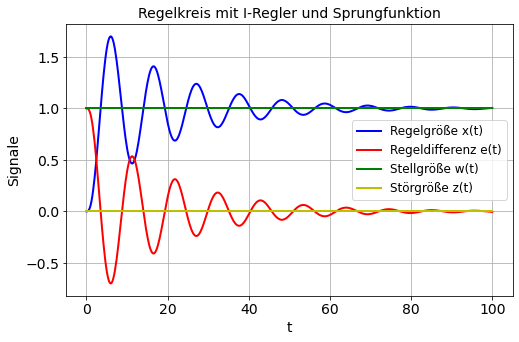

In [5]:
# Fall 1b: Grafische Darstellung der Signale x(t), w(t), e(t) und z(t)

x0    = None
numGw = [1]
denGw = [2, 3, 1, 1]

numGe = [2, 3, 1, 0]
denGe = [2, 3, 1, 1]

systemGw = signal.TransferFunction(numGw, denGw)
systemGe = signal.TransferFunction(numGe, denGe)

t = linspace(0, 100, 500)
t, x = signal.step(systemGw, x0, t)
t, e = signal.step(systemGe, x0, t)
w = ones(len(t))
z = zeros(len(t))

figure(figsize=(8,5))
title('Regelkreis mit I-Regler und Sprungfunktion')
plot(t, x, '-b', label='Regelgröße x(t)')
plot(t, e, '-r', label='Regeldifferenz e(t)')
plot(t, w, '-g', label='Stellgröße w(t)')
plot(t, z, '-y', label='Störgröße z(t)')
xlabel('t')
ylabel('Signale')
legend()
grid(True)

Überprüfung der Ergebnisse mittels Endwertsatz:

- $\lim_{t\to \infty}x(t) = \lim_{s\to 0}sX(s) = \lim_{s\to 0}s\frac{1}{2s^3+3s^2+s+1} \frac{1}{s}=1$  
- $\lim_{t\to \infty}e(t) = \lim_{s\to 0}sE(s) = \lim_{s\to 0}s\frac{2s^3+3s^2+s}{2s^3+3s^2+s+1} \frac{1}{s}= 0$  

In [6]:
Endwertx = 1
Endwerte = 0
print('Die Regelgröße x(t)     stellt sich bei t gegen unendlich auf',Endwertx,'ein.')
print('Die Regeldifferenz e(t) stellt sich bei t gegen unendlich auf',Endwerte,'ein.')

Die Regelgröße x(t)     stellt sich bei t gegen unendlich auf 1 ein.
Die Regeldifferenz e(t) stellt sich bei t gegen unendlich auf 0 ein.


Ergebnis Fall 1b: 

Der Regelkreis mit dem I-Regler schwingt zu Beginn sehr stark und stellt sich erst nach einer gewissen Zeit (>80 Zeiteinheiten) auf die Stellgröße ein. Bei t gegen Unendlich erreicht die Regelgröße den gewünschten Endwert der Stellgröße. Demnach exisitert bei t gegen Unendlich auch keine Regelabweichung.

*Fall 2:*

- $w(t) = t$ ... Rampenfunktion ---> $W(s) = \frac{1}{s^2}$  
- $z(t) = 0$ ---> $Z(s) = 0$  

Verwendung eines I-Reglers: $R(s) = \frac{1}{s}$. Nun gilt: 
- $G_o(s) = R(s)G_1(s)G_2(s) = \frac{1}{s(1+s)(1+2s)}$.
- Regelgröße $X(s) = \frac{G_o}{1+G_o} W(s) = \frac{1}{2s^3+3s^2+s+1} \frac{1}{s^2}$ . 
- Somit lautet die Führungsübertragungsfunktion: $G_w(s) = \frac{1}{2s^3+3s^2+s+1}$.
- Regeldifferenz (Error) $E(s)= W(s) - X(s) = W(s) - \frac{G_o}{1+G_o} W(s)=\frac{1}{1+G_o} W(s) = \frac{2s^3+3s^2+s}{2s^3+3s^2+s+1} \frac{1}{s^2}$.
- Somit lautet die Übertragungsfunktion für die Regeldifferenz: $G_e(s) = \frac{2s^3+3s^2+s}{2s^3+3s^2+s+1}$.

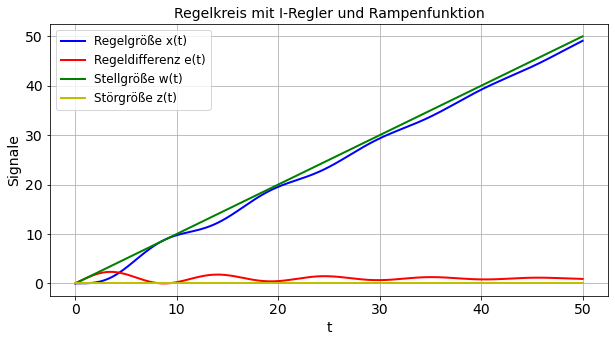

In [7]:
# Fall 2: Grafische Darstellung der Signale x(t), w(t), e(t) und z(t)

x0    = None
numGw = [1]
denGw = [2, 3, 1, 1]

numGe = [2, 3, 1, 0]
denGe = [2, 3, 1, 1]

systemGw = signal.TransferFunction(numGw, denGw)
systemGe = signal.TransferFunction(numGe, denGe)

t = linspace(0, 50, 500)

w = t         # Rampenfunktion
t, x, a = signal.lsim(systemGw, w, t)
t, e, a = signal.lsim(systemGe, w, t)
z = zeros(len(t))

figure(figsize=(10,5))
title('Regelkreis mit I-Regler und Rampenfunktion')
plot(t, x, '-b', label='Regelgröße x(t)')
plot(t, e, '-r', label='Regeldifferenz e(t)')
plot(t, w, '-g', label='Stellgröße w(t)')
plot(t, z, '-y', label='Störgröße z(t)')
xlabel('t')
ylabel('Signale')
legend()
grid(True)

Überprüfung der Ergebnisse mittels Endwertsatz:

- $\lim_{t\to \infty}x(t) = \lim_{s\to 0}sX(s) = \lim_{s\to 0}s\frac{1}{2s^3+3s^2+s+1} \frac{1}{s^2}=\infty$  
- $\lim_{t\to \infty}e(t) = \lim_{s\to 0}sE(s) = \lim_{s\to 0}s\frac{2s^3+3s^2+s}{2s^3+3s^2+s+1} \frac{1}{s^2}=\lim_{s\to 0}s\frac{s (2s^2+3s+1)}{2s^3+3s^2+s+1} \frac{1}{s^2}=1$   

In [8]:
Endwert_e = 1
print('Die Regelgröße x(t) geht bei t gegen unendlich ebenso auf UNENDLICH.')
print('Die Regeldifferenz e(t) stellt sich bei t gegen unendlich auf',Endwert_e,'ein.')

Die Regelgröße x(t) geht bei t gegen unendlich ebenso auf UNENDLICH.
Die Regeldifferenz e(t) stellt sich bei t gegen unendlich auf 1 ein.


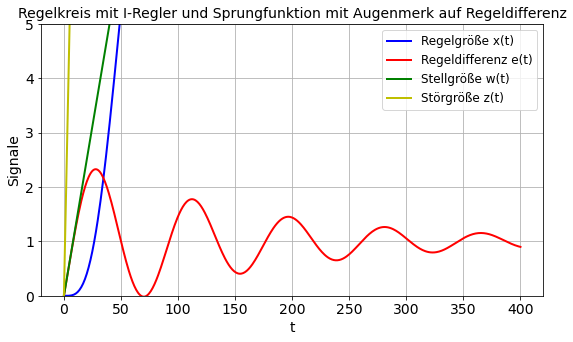

In [9]:
# Darstellung der Regeldifferenz bei großen Zeiteinheiten
t = linspace(0, 400, 500)

figure(figsize=(9,5))
title('Regelkreis mit I-Regler und Sprungfunktion mit Augenmerk auf Regeldifferenz')
plot(t, x, '-b', label='Regelgröße x(t)')
plot(t, e, '-r', label='Regeldifferenz e(t)')
plot(t, w, '-g', label='Stellgröße w(t)')
plot(t, t, '-y', label='Störgröße z(t)')
ylim(0,5)
xlabel('t')
ylabel('Signale')
legend()
grid(True)

Ergebnis Fall 2: 

Die Regelgröße folgt in diesem Beispiel nach einem Einschwingen der stetig ansteigenden Stellgröße. Bei t gegen Unendlich stellt sich eine Regelabweichung von 1 ein. Der Einschwingvorgang der Regelgröße und der Regeldifferenz dauert im Gegensatz zu den Fällen 1a und 1b sehr lange.

*Fall 3:*

- $w(t) = 0$ ---> $W(s) = 0$  
- $z(t) = 1$ ... Sprungfunktion (für t>=0) ---> $Z(s) = \frac{1}{s}$    

Verwendung eines I-Reglers $R(s) = \frac{1}{s}$. Nun gilt: 

- $G_o(s) = R(s)G_1(s)G_2(s) = \frac{1}{s(1+s)(1+2s)}$.
- Regelgröße $X(s) = \frac{G_2}{1+G_o} Z(s) = \frac{1}{1+2s} \frac{s(1+s)(1+2s)}{2s^3+3s^2+s+1} \frac{1}{s}= \frac{s^2+s}{2s^3+3s^2+s+1} \frac{1}{s}$.
- Somit lautet die Störungsübertragungsfunktion: $G_z(s) = \frac{s^2+s}{2s^3+3s^2+s+1}$.
- Regeldifferenz (Error) $E(s)= W(s) - X(s) = -X(s) =-\frac{s^2+s}{2s^3+3s^2+s+1} \frac{1}{s}$.
- Somit lautet die Übertragungsfunktion für die Regeldifferenz: $G_e(s) = -  \frac{s^2+s}{2s^3+3s^2+s+1}$.

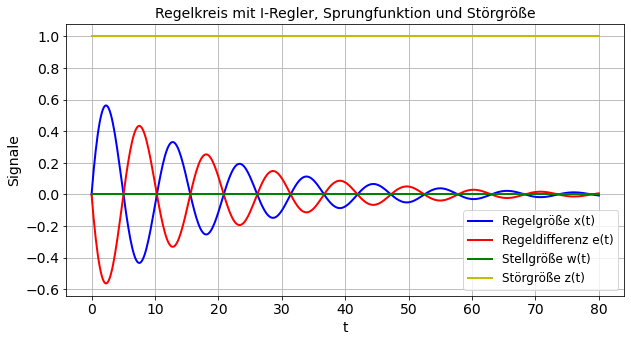

In [10]:
# Fall 3: Grafische Darstellung der Signale x(t), w(t), e(t) und z(t)

x0    = None
numGw = [1, 1, 0]
denGw = [2, 3, 1, 1]

numGe = [-1, -1, 0]
denGe = [2, 3, 1, 1]

systemGw = signal.TransferFunction(numGw, denGw)
systemGe = signal.TransferFunction(numGe, denGe)

t = linspace(0, 80, 500)
t, x = signal.step(systemGw, x0, t)
t, e = signal.step(systemGe, x0, t)
w = zeros(len(t))
z = ones(len(t))

figure(figsize=(10,5))
title('Regelkreis mit I-Regler, Sprungfunktion und Störgröße')
plot(t, x, '-b', label='Regelgröße x(t)')
plot(t, e, '-r', label='Regeldifferenz e(t)')
plot(t, w, '-g', label='Stellgröße w(t)')
plot(t, z, '-y', label='Störgröße z(t)')
xlabel('t')
ylabel('Signale')
legend()
grid(True)

Überprüfung der Ergebnisse mittels Endwertsatz:

- $\lim_{t\to \infty}x(t) = \lim_{s\to 0}sX(s) = \lim_{s\to 0}s\frac{s^2+s}{2s^3+3s^2+s+1} \frac{1}{s}=0$  
- $\lim_{t\to \infty}e(t) = \lim_{s\to 0}sE(s) = \lim_{s\to 0}s\frac{-s^2-s}{2s^3+3s^2+s+1} \frac{1}{s}=0$   

Ergebnis Fall 3: 

Der Regelkreis mit Störgröße (Sprungfunktion) und ohne Stellgröße kann die Störung im Laufe der Zeit (>80 Zeiteinheiten) ausregeln, sprich eliminieren. Das bedeutet, dass bei diesem Regelkreis die Störgröße schlussendlich keinen Einfluss auf die Regelgröße hat. Die Regelgröße ist der Regeldifferenz um 180° phasenverschoben - klar, die Summe der beiden Größen ergibt die Stellgröße und diese beträgt Null.